#Recurrent Neural Network

##Part 1 - Data Preprocessing

###Importing the libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
os.chdir('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 8 - Deep Learning/Recurrent Neural Networks/')

###Importing the training set

In [2]:
train_data = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = train_data.iloc[:, 1:2].values#only numpy arrays are used as input for keras. 
#if only 1 was there, it creates a vector but not numpy array. Upper bound is not included in range
#.values creates numpy array
type(training_set)

numpy.ndarray

###Feature Scaling

In [3]:
#if signmoid function is the activation function in the output layer of RNN, normalization is used for feature scaling
#Sklearn library, preprocessing module, class MinMaxscaler, sc = object of class
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)#fit method calculates min & max values, transform method calculates the scaled values

###Creating a data structure with 60 timesteps and 1 output

In [4]:
#60 timesteps means, RNN is going to look at 60 stock prices before time T and learn and understand some correlations then t+1th output is predicted
#1 timestep => overfitting, model doesnt learn anything

#x_train will contain stock prices for 60 previous financial days and y_train will contain the next day's predicted output
x_train = []
y_train = []

for i in range(60, 1258):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

###Reshaping


In [5]:
#adding more dimentionality to the dataset created earlier

#Keras documnetation, input shape: 3d tensor with shape(batch_size, timesteps, input(dim))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))#imp for financial predictions

##Part 2 - Building and Training the RNN

###Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

###Initialising the RNN

In [7]:
regressor = Sequential()

###Adding the first LSTM layer and some Dropout regularisation

In [8]:
from keras.engine import input_layer
#no of units in LSTM layer is represented by units
#return sequences = True => stacked LSTM which will have several LSTM layers. When another LSTM layer is added, return sequence argumenthastobe true.
#default value is false, when no other layer is to be added, we keep the default value as is
#input shape = shape of x_train (3d), 2 last indicators, timesteps & input(dim) are to be added
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))

#Dropout regularisation layer is adde dto avoid over fitting
#input is drop out rate which is the rate of neurons that are to be dropped in the layers to do regularization
#20% neurons are dropped - used generally
regressor.add(Dropout(0.2))

###Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

###Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

###Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

###Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

###Compiling the RNN


In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

###Fitting the RNN to the Training set

In [15]:
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 20s 275ms/step - loss: 0.0396
Epoch 2/100
38/38 [==============================] - 13s 337ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 8s 208ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 8s 218ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 9s 226ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 7s 174ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 10s 257ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 9s 238ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 6s 160ms/step - loss: 0.0042
Epoch 13/1

##Part 3 - Making the predictions and visualising the results

##Getting the real stock price of 2017

In [20]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_data.iloc[:, 1:2].values

###Getting the predicted stock price of 2017

In [21]:
dataset_total = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

###Visualising the results

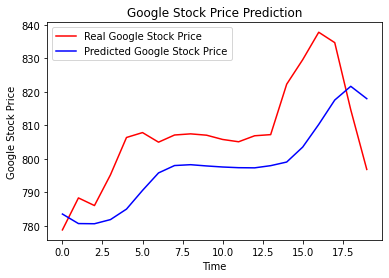

In [22]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()